<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Test-auto.arima-on-simulated-data" data-toc-modified-id="Test-auto.arima-on-simulated-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Test <code>auto.arima</code> on simulated data</a></span></li><li><span><a href="#Test-auto.arima-on-real-data" data-toc-modified-id="Test-auto.arima-on-real-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Test <code>auto.arima</code> on real data</a></span><ul class="toc-item"><li><span><a href="#A-subset-of-time-series" data-toc-modified-id="A-subset-of-time-series-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>A subset of time series</a></span></li><li><span><a href="#All-data" data-toc-modified-id="All-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>All data</a></span><ul class="toc-item"><li><span><a href="#Parallel" data-toc-modified-id="Parallel-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Parallel</a></span></li><li><span><a href="#Single-cpu" data-toc-modified-id="Single-cpu-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Single cpu</a></span></li></ul></li></ul></li></ul></div>

In [1]:
print(R.version)
file.path(R.home("bin"), "R")

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.0                         
year           2023                        
month          04                          
day            21                          
svn rev        84292                       
language       R                           
version.string R version 4.3.0 (2023-04-21)
nickname       Already Tomorrow            


[1] "/software/R/4.3.0/lib64/R/bin/R"

In [2]:
.libPaths()

[1] "/home/kzy816/R/x86_64-pc-linux-gnu-library/4.3"
[2] "/hpc/software/R/4.3.0/lib64/R/library"

In [23]:
# detach("package:AFTSCode", unload = TRUE) # First detach the package
# unloadNamespace("AFTSCode")

In [24]:
library(AFTSCode)

# Test `auto.arima` on simulated data

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



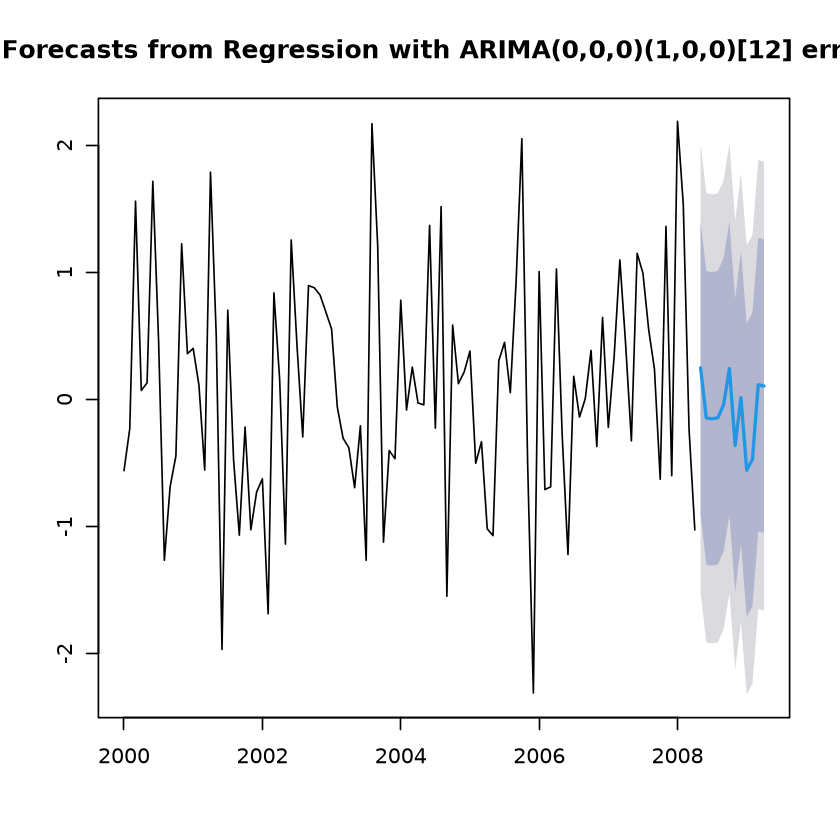

In [3]:
# Assuming 'forecast' package is installed and loaded
library(forecast)

# Simulate some time series data
set.seed(123)
ts_data <- ts(rnorm(100), frequency = 12, start = c(2000, 1))

# Simulate exogenous regressor data for model fitting
xreg_train <- matrix(rnorm(200), ncol = 2) # Two exogenous regressors

# Fit an ARIMA model with exogenous regressors
# fit <- auto.arima(ts_data, xreg = xreg_train)
fit <- auto.arima(ts_data, xreg = xreg_train)

# Simulate future values of the exogenous regressors for forecasting
xreg_future <- matrix(rnorm(24), ncol = 2) # Two exogenous regressors for 12 future periods

# Forecast using the model and future values of exogenous regressors
forecast_result <- forecast(fit, xreg = xreg_future)

# Plot the forecast
par(bg = 'white')
plot(forecast_result)

[1] 76
2004.25 ; 2008.333

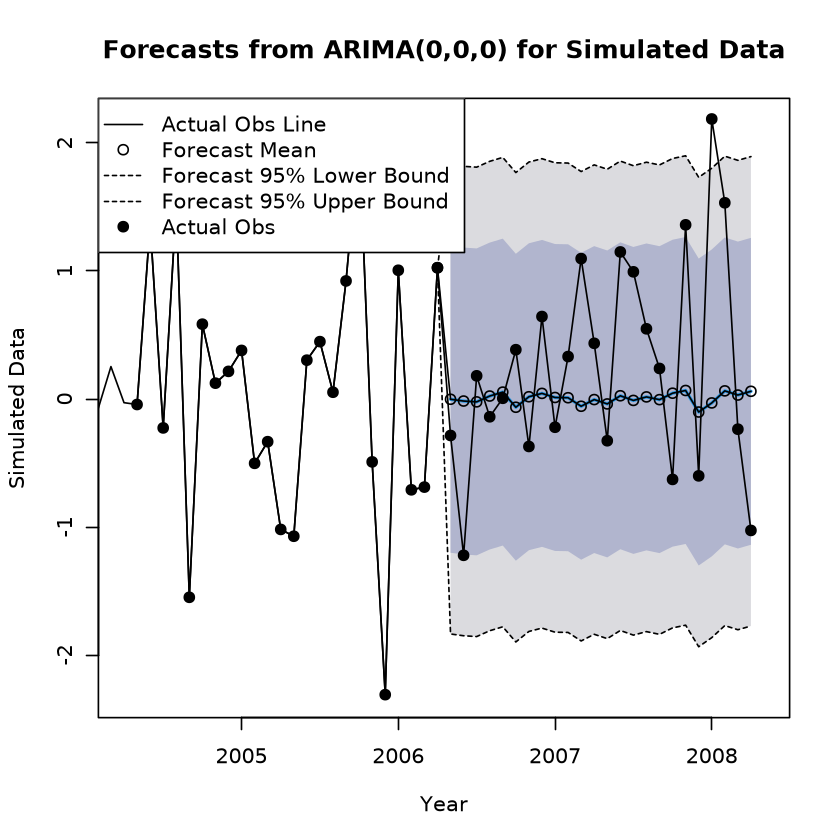

In [8]:
npts = 24
eotr = length(ts_data)-npts
h = npts
freq = 12
xreg = xreg_train
sub_ew_fc_res = plot_auto_arima_forecast_fig(
    da_ts=ts_data, eotr=eotr, h=h, npts=npts, frequency=freq, 
    xreg=xreg,
    main="Forecasts from ARIMA(0,0,0) for Simulated Data", 
    xlab="Year", ylab="Simulated Data"# , ylim=c(5, 11)
)

# Test `auto.arima` on real data

In [9]:
lib_dir = "/home/kzy816/R/x86_64-pc-linux-gnu-library/4.3/"

In [4]:
# install.packages("sandwich", lib = lib_dir)

In [10]:
require(xts)
require(sandwich)
require(lmtest)
require(forecast)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: lmtest



In [11]:
da = read.table("../AFTS_sol/data/d-ibm3dxwkdays8008.txt", header = T)
da[1:5,]

,year,mom,day,ibm,vw,ew,sp,M,T,W,R,F
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1980,1,2,-0.029126,-0.020089,-0.011686,-0.020196,0,0,1,0,0
2,1980,1,3,0.016000,-0.006510,-0.011628,-0.005106,0,0,0,1,0
3,1980,1,4,-0.001969,0.013735,0.015809,0.012355,0,0,0,0,1
4,1980,1,7,-0.003945,0.004368,0.007013,0.002722,1,0,0,0,0
5,1980,1,8,0.067327,0.019340,0.014152,0.020036,0,1,0,0,0


In [12]:
ew = da$ew * 100
ew_ts = ts(ew, frequency = 252, start = c(1980, 1, 2))

In [13]:
help(auto.arima)

## A subset of time series

In [14]:
da[6560:6570,]; da[6812:6822,]

,year,mom,day,ibm,vw,ew,sp,M,T,W,R,F
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
6560,2005,12,23,0.003124,0.000981,0.003363,0.000426,0,0,0,0,1
6561,2005,12,27,-0.005870,-0.009806,-0.007569,-0.009553,0,1,0,0,0
6562,2005,12,28,0.000603,0.002857,0.003299,0.001297,0,0,1,0,0
6563,2005,12,29,-0.007707,-0.002343,0.000072,-0.002981,0,0,0,1,0
6564,2005,12,30,-0.002427,-0.004415,0.000053,-0.004887,0,0,0,0,1
6565,2006,1,3,-0.001703,0.016428,0.010981,0.016430,0,1,0,0,0
6566,2006,1,4,-0.001340,0.005531,0.007697,0.003673,0,0,1,0,0
6567,2006,1,5,0.006711,-0.000332,0.002920,0.000016,0,0,0,1,0
6568,2006,1,6,0.029697,0.009813,0.009032,0.009399,0,0,0,0,1


,year,mom,day,ibm,vw,ew,sp,M,T,W,R,F
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
6812,2006,12,26,0.004305,0.004329,0.004140,0.004352,0,1,0,0,0
6813,2006,12,27,0.016099,0.007789,0.008718,0.007015,0,0,1,0,0
6814,2006,12,28,-0.002366,-0.001034,-0.000479,-0.001479,0,0,0,1,0
6815,2006,12,29,0.001856,-0.004519,-0.001187,-0.004513,0,0,0,0,1
6816,2007,1,3,0.001235,-0.001349,-0.000143,-0.001199,0,0,1,0,0
6817,2007,1,4,0.010692,0.000605,0.000588,0.001228,0,0,0,1,0
6818,2007,1,5,-0.009053,-0.007231,-0.009794,-0.006085,0,0,0,0,1
6819,2007,1,8,0.015192,0.002559,0.001731,0.002220,1,0,0,0,0
6820,2007,1,9,0.011830,-0.000023,0.000276,-0.000517,0,1,0,0,0


In [15]:
sub_ew_ts = ts(ew[6565:length(ew)], frequency = 252, start = c(2006, 1, 3))
sub_da = da[6565:length(ew),]
length(sub_ew_ts)

[1] 755

In [16]:
sub_ts_fm <- auto.arima(
    sub_ew_ts,
    d = 0,
    D = 0,
    max.p = 2,
    max.q = 2,
    max.P = 1,
    max.Q = 0,
    max.order = 5,
    seasonal = TRUE,
    method = "ML",
    allowmean = TRUE,
    xreg = as.matrix(sub_da[, 8:11]),
    stepwise = FALSE,
    parallel = TRUE,
    num.cores = 6
)
sub_ts_fm

Series: sub_ew_ts 
Regression with ARIMA(2,0,2) errors 

Coefficients:
          ar1      ar2     ma1     ma2        M       T        W       R
      -0.9976  -0.6214  1.0519  0.5740  -0.2183  0.0709  -0.0023  -0.060
s.e.   0.2445   0.2018  0.2520  0.2289   0.1147  0.1108   0.1099   0.111

sigma^2 = 2.013:  log likelihood = -1331.43
AIC=2680.87   AICc=2681.11   BIC=2722.51

[1] 734
2008.833 ; 2008.996

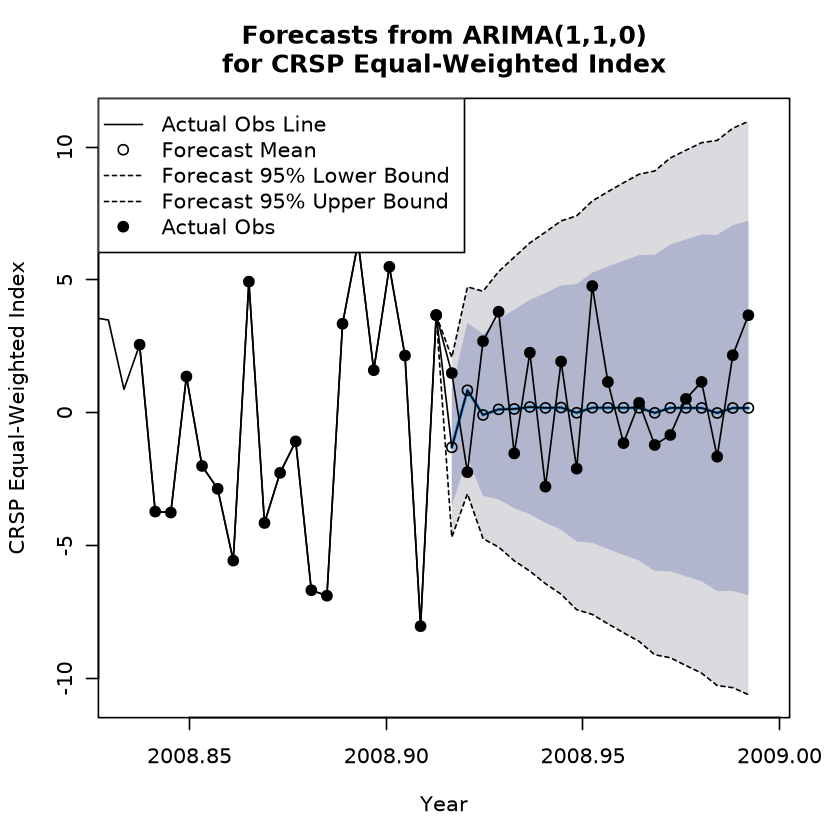

In [17]:
npts = 20
eotr = length(sub_ew_ts)-npts
h = npts
freq = 252
xreg = as.matrix(sub_da[, 8:11])
sub_ew_fc_res = plot_auto_arima_forecast_fig(
    da_ts=sub_ew_ts, eotr=eotr, h=h, npts=npts, frequency=freq, 
    xreg=xreg,
    main="Forecasts from ARIMA(1,1,0)\nfor CRSP Equal-Weighted Index", 
    xlab="Year", ylab="CRSP Equal-Weighted Index"# , ylim=c(5, 11)
)

In [18]:
sub_ew_fc_tb = comb_forecast_res(sub_ew_fc_res, sub_ew_ts, eotr, freq)
sub_ew_fc_tb


Forecast method: Regression with ARIMA(1,1,0) errors

Model Information:
Series: tr_da_ts 
Regression with ARIMA(1,1,0) errors 

Coefficients:
          ar1    drift     xreg
      -0.4319  -0.0011  -0.1894
s.e.   0.0343   0.0444   0.1196

sigma^2 = 2.983:  log likelihood = -1441.2
AIC=2890.39   AICc=2890.45   BIC=2908.79

Error measures:
                        ME     RMSE      MAE      MPE     MAPE     MASE
Training set -0.0001707146 1.722408 1.026185 128.2297 323.7154 0.850973
                   ACF1
Training set -0.1714507

Forecasts:
         Point Forecast     Lo 80     Hi 80      Lo 95     Hi 95
2008.917   -1.298624463 -3.512011 0.9147619  -4.683707  2.086458
2008.921    0.849334056 -1.696299 3.3949670  -3.043876  4.742544
2008.925   -0.079878948 -3.124575 2.9648171  -4.736340  4.576582
2008.929    0.130539853 -3.260069 3.5211483  -5.054948  5.316028
2008.933    0.145715474 -3.590326 3.8817573  -5.568067  5.859498
2008.937    0.219419115 -3.819953 4.2587911  -5.958267  6.397105

A Time Series:
 [1] -1.298624463  0.849334056 -0.079878948  0.130539853  0.145715474
 [6]  0.219419115  0.186057742  0.198936766  0.002474672  0.193378414
[11]  0.191186694  0.190603831  0.189326118 -0.001021811  0.187241279
[16]  0.186190032  0.185114609 -0.005320687  0.182980137  0.181912593

A Time Series:
 [1] 1.727115 1.986368 2.375789 2.645706 2.915249 3.151939 3.376055 3.584563
 [9] 3.782258 3.969847 4.149076 4.320830 4.486033 4.645356 4.799397 4.948643
[17] 5.093519 5.234386 5.371561 5.505318

A Time Series:
 [1]  1.4960 -2.2343  2.6950  3.8066 -1.5286  2.2634 -2.7784  1.9321 -2.1021
[10]  4.7713  1.1627 -1.1401  0.3764 -1.2094 -0.8332  0.5254  1.1629 -1.6514
[19]  2.1692  3.6731

,Forecast,Std. Error,Actual
2008.917,-1.298624463,1.727115,1.4960
2008.921,0.849334056,1.986368,-2.2343
2008.925,-0.079878948,2.375789,2.6950
2008.929,0.130539853,2.645706,3.8066
2008.933,0.145715474,2.915249,-1.5286
2008.937,0.219419115,3.151939,2.2634
2008.940,0.186057742,3.376055,-2.7784
2008.944,0.198936766,3.584563,1.9321
2008.948,0.002474672,3.782258,-2.1021
2008.952,0.193378414,3.969847,4.7713


## All data

### Parallel

In [19]:
ts_fm <- auto.arima(
    ew_ts,
    d = 0,
    D = 0,
    max.p = 2,
    max.q = 2,
    max.P = 1,
    max.Q = 0,
    max.order = 5,
    seasonal = TRUE,
    method = "ML",
    allowmean = TRUE,
    xreg = as.matrix(da[, 8:11]),
    stepwise = FALSE,
    parallel = TRUE,
    num.cores = 12
)
ts_fm

Series: ew_ts 
Regression with ARIMA(2,0,2) errors 

Coefficients:
         ar1     ar2      ma1      ma2  intercept        M        T        W
      0.6224  0.2507  -0.4249  -0.3517     0.2250  -0.3181  -0.1989  -0.1059
s.e.  0.0948  0.0685   0.0931   0.0551     0.0243   0.0275   0.0291   0.0293
            R
      -0.0997
s.e.   0.0271

sigma^2 = 0.6429:  log likelihood = -8764.09
AIC=17548.19   AICc=17548.22   BIC=17617.17

[1] 7299
2008.881 ; 2009.044

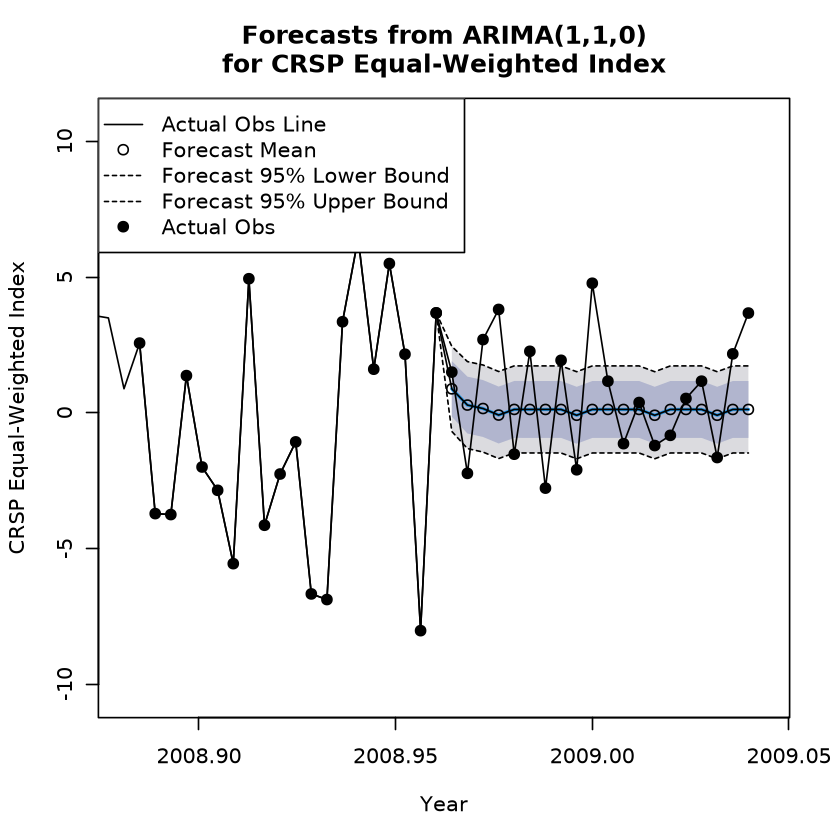

In [20]:
npts = 20
eotr = length(ew_ts)-npts
h = npts
freq = 252
xreg = as.matrix(da[, 8:11])
ew_fc_res = plot_auto_arima_forecast_fig(
    da_ts=ew_ts, eotr=eotr, h=h, npts=npts, frequency=freq,
    xreg=xreg,
    main="Forecasts from ARIMA(1,1,0)\nfor CRSP Equal-Weighted Index",
    xlab="Year", ylab="CRSP Equal-Weighted Index"# , ylim=c(5, 11)
)

In [21]:
ew_fc_tb = comb_forecast_res(ew_fc_res, ew_ts, eotr, freq)
ew_fc_tb


Forecast method: Regression with ARIMA(1,0,0) errors

Model Information:
Series: tr_da_ts 
Regression with ARIMA(1,0,0) errors 

Coefficients:
         ar1  intercept     xreg
      0.2132     0.1206  -0.2135
s.e.  0.0114     0.0126   0.0223

sigma^2 = 0.6396:  log likelihood = -8724.42
AIC=17456.85   AICc=17456.85   BIC=17484.43

Error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set 9.825538e-05 0.7995938 0.5048959 67.66125 227.4332 0.6917405
                     ACF1
Training set -0.001080479

Forecasts:
         Point Forecast      Lo 80     Hi 80      Lo 95    Hi 95
2008.964     0.87918219 -0.1457492 1.9041136 -0.6883151 2.446679
2008.968     0.28235530 -0.7656152 1.3303258 -1.3203772 1.885088
2008.972     0.15510008 -0.8939058 1.2041059 -1.4492159 1.759416
2008.976    -0.08557408 -1.1346270 0.9634788 -1.6899620 1.518814
2008.980     0.12218142 -0.9268736 1.1712365 -1.4822098 1.726573
2008.984     0.12094787 -0.9281073 1.1700030 -1.

A Time Series:
 [1]  0.87918219  0.28235530  0.15510008 -0.08557408  0.12218142  0.12094787
 [7]  0.12068485  0.12062877 -0.09292404  0.12061426  0.12061372  0.12061360
[13]  0.12061358 -0.09292728  0.12061357  0.12061357  0.12061357 -0.09292728
[19]  0.12061357  0.12061357

A Time Series:
 [1] 0.7997582 0.8177357 0.8185436 0.8185803 0.8185820 0.8185821 0.8185821
 [8] 0.8185821 0.8185821 0.8185821 0.8185821 0.8185821 0.8185821 0.8185821
[15] 0.8185821 0.8185821 0.8185821 0.8185821 0.8185821 0.8185821

A Time Series:
 [1]  1.4960 -2.2343  2.6950  3.8066 -1.5286  2.2634 -2.7784  1.9321 -2.1021
[10]  4.7713  1.1627 -1.1401  0.3764 -1.2094 -0.8332  0.5254  1.1629 -1.6514
[19]  2.1692  3.6731

,Forecast,Std. Error,Actual
2008.964,0.87918219,0.7997582,1.4960
2008.968,0.28235530,0.8177357,-2.2343
2008.972,0.15510008,0.8185436,2.6950
2008.976,-0.08557408,0.8185803,3.8066
2008.980,0.12218142,0.8185820,-1.5286
2008.984,0.12094787,0.8185821,2.2634
2008.988,0.12068485,0.8185821,-2.7784
2008.992,0.12062877,0.8185821,1.9321
2008.996,-0.09292404,0.8185821,-2.1021
2009.000,0.12061426,0.8185821,4.7713


In [25]:
npts = 20
eotr = length(ew_ts)-npts
h = npts
freq = 252
xreg = as.matrix(da[, 8:11])
ew_fc_res = plot_auto_arima_forecast_fig(
    da_ts=ew_ts, eotr=eotr, h=h, npts=npts, frequency=freq,
    xreg=xreg,
    main="Forecasts from ARIMA(2,0,2)\nfor CRSP Equal-Weighted Index",
    xlab="Year", ylab="CRSP Equal-Weighted Index", # ylim=c(5, 11)
    ts_fc_res=ew_fc_res
)

ERROR: Error in myarima(x, order = c(p, d, q), seasonal = c(P, D, Q), constant = constant, : Error in stats::arima(x = x, order = order, seasonal = list(order = seasonal,  : 
  unused argument (ts_fc_res = list("Regression with ARIMA(1,0,0) errors", list(c(0.213219638414032, 0.120613571940268, -0.213540849431708), 0.639613191109031, c(0.000131101793795808, 7.77391899284754e-08, -1.88707920440773e-07, 7.77391899284754e-08, 0.000159436591608697, -9.44309448252232e-05, -1.88707920440773e-07, -9.44309448252231e-05, 0.000496973533436238), c(TRUE, TRUE, TRUE), -8724.42414462085, 17456.8482892417, c(1, 0, 0, 0, 252, 0, 0), c(-1.25956719256786, -1.0085279202927, 1.7339354058045, 0.482865533319625, 
1.12524157513445, 0.348555177973122, 0.864812335710524, 0.369496122726724, 0.853272375847146, 0.202479737376995, 0.383277372439603, 0.0180841941347608, 0.293222794711866, 0.804119716460767, -0.767246912734166, 0.863533897674006, 0.28879207729291, 0.167786753312063, 0.779953406392746, -0.463271005751261, 0.669656918811928, -0.230740115966376, 0.263103183379904, 0.107316306654806, 0.0877213333827221, 0.410061813832782, 0.402325559515411, 0.540781634957458, -0.351595002975194, 0.118066970655791, 0.0762308980789113, 
-0.870862918978638, -0.427896799954206, -0.74117463048656, 0.604224948886392, -0.672743096812344, -0.565697019121483, -0.77432695623484, 0.167362508761401, -0.393505986658223, -0.0868867886619826, 0.382584421634984, -0.485322501631777, -0.855758184865914, -1.26043794929243, -2.17466885463012, -1.04778269114726, -1.22613056125086, 0.845957618948638, -0.454249708714787, -0.348871224847072, -0.369546702869984, -2.54707408288927, -0.213432122468173, 0.770646268766997, -0.608487237412719, -0.461371861516543, 
-2.48239924049421, -1.27949395710077, -0.0449805734293703, -5.63862559382371, 4.8508790013978, 0.561598747418796, 0.479668428788613, 0.836104230260242, -0.231338418875531, -1.50216790932139, 0.546310709378245, 0.878072259293089, 0.836626614728693, 0.257298893779978, -0.722246171938588, -0.221737924365064, -0.516230926137504, -0.667048618086488, 0.0941151390539391, -0.865878355823311, 2.18471901108021, 0.30145366984263, 0.679736000809244, -0.496506432284106, 0.612640626130506, 0.231939874918747, 0.173667565732004, 
-0.30146782649891, 0.209695723973657, 0.541718653956158, 0.19145799791096, 0.756117033438081, -0.324611762514661, -0.331319630048539, 0.189650222003772, 0.551357368532816, 0.569324063884336, 0.220141332081418, 0.217688460819089, 0.228295836361242, -0.0606515906709786, 0.000769492406307598, 0.756154780261673, 0.735409987367554, 0.166295272098066, 0.0919633011309121, -0.606274221317312, 0.311809803615293, -0.0149242039307124, -0.157377810780529, 0.76077738493902, 0.116380137243148, 0.284957546106836, 
0.316617157283465, 0.168288918872922, 0.376685904766641, -0.219459088545629, 0.5683174696894, 0.126457024949804, 0.0439241033943574, -0.111373153604611, -0.438107691040394, -0.0992626935616515, 0.515591796135518, 0.249399791209985, 0.598377160563652, -0.182728816752557, 0.0909475316897587, -0.585281770837362, 0.296525400690517, 0.416869275322266, 0.798823640132434, 0.373149341168188, -0.177696586066485, 0.271828129108894, -0.245762496268354, 0.47638634101796, 1.1464090528748, -0.23216248592364, 0.310044971470838, 
0.807120018450522, 0.386486104143174, 0.313455318484396, -0.298097862530282, -0.0920580083335119, 0.0835445487605543, -0.254652470393478, 0.405442543430246, 0.477186147819669, 0.493864149676334, -0.375037130953935, 0.339242845420001, -0.124585186893032, 0.15809873703832, 0.501957762149259, 0.728885898516932, 0.102651776500106, 0.599638267371355, -0.559301705462708, 0.164043062504043, 0.950940492910559, 0.259027253481401, -1.17085960449457, -0.276011901548811, 0.711558629443808, 1.10250466026185, 
0.443451981084731, -0.0265028934246703, 0.21664137679953, -0.288744372234523, -0.602098945795787, 0.525136457892926, 0.603086541436112, 1.08384858169495, -0.154470833385331, 0.152804244842896, -0.17725384113755, 0.227188717413152, 0.735299765240999, 0.59023237496086, 0.33889527522292, 0.278399030124779, 0.711891051173468, 0.917492928963187, -0.233937781164442, 0.781458405068439, 0.269105633694277, -0.838497862530282, 0.115065884265431, -0.415150336009695, -1.63279894162931, -1.90992842582546, 1.45316701648699, 
0.341277999734511, 0.401530247868405, 0.908077583273936, 1.0300446476071, -0.388346921067111, 0.534687405605806, 0.0042458137665518, 0.0136594686146672, 0.847991790927428, -0.00223539851954127, 0.448445821057879, -0.674927320079864, -0.243040942637818, 0.352412695389076, -0.458469500745623, 0.4931558552657, -0.995082968645155, 0.411414075507711, -0.57530906595094, -0.208347521279948, 0.142154147758674, -0.786024965487186, 0.391732409334258, 0.481422703556444, 0.896595525567275, -1.47277722507888, 
-0.0638869828304256, 0.202619091249095, 0.649478263619901, 1.01331169487458, 0.676423624508162, 0.350423629716253, 0.0129350631916366, 0.589047346824412, 0.0275967708539949, 0.412466077392256, -0.497291924724095, -0.394334212098081, 0.576247360365447, 0.270544535219519, 0.293556904229274, -1.05285810990511, -0.469271392004911, 0.408296373142546, 0.324399337322624, -1.23958339448029, -2.44017619956555, -0.307455575690942, -0.839492108476357, -2.25749146555718, 1.45922775639628, 0.10368004400449, -0.32395436276585, 
0.68491981803237, 0.438746237518454, 0.562814469052688, 0.746574718982025, -0.169739237285495, 0.2854969973126, 0.241776948687701, -0.542703310926864, 0.0986995991247779, 0.872771624706854, 0.639240475203051, 0.976381325676377, 0.170487622618381, -3.44735269164399, 0.0795087994412977, 0.905824943678302, 0.37582972775299, -0.302157992780707, 0.489461394247353, 0.20182577243298, 0.389713835508071, 0.208699031166397, -1.25401534364493, -0.153913850025628, -0.499444997446195, 0.174299995866076, -0.315081556878175, 
0.417227313823785, -0.095627956749335, 0.143460324451416, -0.0397695298394632, -1.76951631035638, 0.368541845341012, 0.357850942537338, 0.595204452552375, 0.461197622524272, -0.317918456197963, -0.201599554413036, -0.309132847603717, -0.49550235456013, -0.171163757107879, -0.0635946801530771, 0.0873763182679381, -0.93781046626012, -0.119103834566933, 0.341271542925995, 0.112601074965108, -0.160471236304871, 0.771428557027269, 0.541740691245475, 0.325448492622765, -0.383256072356112, 0.191617259896686, 
-0.0265490605875166, 0.174869492406308, 0.410674090645498, -0.442741786046616, -0.227280819678719, 1.11173239891808, 0.23534175062523, 0.63862632315512, -0.301334329765223, 0.330556915687074, 0.134666074267402, 0.708843901674902, 0.531159578919015, -0.27981812407275, 0.812119601989947, -0.0929535526888313, -0.385131575306393, 0.149972183761939, 0.618299373707791, 0.260514680928639, 0.0847396329073374, 0.118233881008116, -0.601569618911649, 0.181338620328931, 0.255374821595245, 0.327503814841285, 
0.25366372696605, -0.507847661319954, -0.394991659797087, 0.623340505409977, 0.592564363635522, 0.278272799599048, -0.486120037206018, 0.0499684351097886, 0.185481433497689, 0.501193582298548, 0.14866214226279, -0.990824084723068, -0.517035604074317, 0.3111185488599, -0.184084668860854, -1.25122291705073, -0.485094626060402, 0.286759061528655, 0.393236867062175, 0.264158395693876, -0.733585614811407, 0.102021777966987, 0.175655634015186, 0.398575032429578, 0.378088032900714, 0.191367687494152, -0.422915556562503, 
0.29029764543987, -0.0337117489736258, 0.254673330130643, 0.26654923086384, 0.445260530077659, 0.196937071646799, 0.179337502690028, 0.131455325775723, -1.26956651364995, -0.163065235031446, 0.243092956045258, 0.33639464896963, 0.00537344668470004, -0.470429837663908, 0.163471208246278, 0.692103606090188, 0.115670969288256, 0.20684978158598, -1.03212408472307, 0.156370366992183, -0.584787222830066, 0.264425582431009, -0.0376662070224515, 0.235871656925548, -0.288825395488796, 0.053827493481041, -0.073129015087472, 
-0.426811404919346, -0.735512341966603, -0.620581022180107, -0.644668016500881, -1.12335978928845, -0.251752195050288, -0.0954667431619381, 0.577060328617889, 0.241107220480774, 0.124101165550179, -0.605099349828412, 0.441925368471822, 0.13413259829461, 0.265148379193563, -1.21372676519125, -0.75764324313782, -0.279879312589845, -0.216265464614905, 0.56073943561404, 0.44648346526825, -0.473088696


### Single cpu

In [22]:
sp_ts_fm <- auto.arima(
    ew_ts,
    d = 0,
    D = 0,
    max.p = 2,
    max.q = 2,
    max.P = 1,
    max.Q = 0,
    max.order = 5,
    seasonal = TRUE,
    method = "ML",
    allowmean = TRUE,
    xreg = as.matrix(da[, 8:11]),
)
sp_ts_fm

Series: ew_ts 
Regression with ARIMA(2,0,2) errors 

Coefficients:
         ar1     ar2      ma1      ma2  intercept        M        T        W
      0.6224  0.2507  -0.4249  -0.3517     0.2250  -0.3181  -0.1989  -0.1059
s.e.  0.0948  0.0685   0.0931   0.0551     0.0243   0.0275   0.0291   0.0293
            R
      -0.0997
s.e.   0.0271

sigma^2 = 0.6429:  log likelihood = -8764.09
AIC=17548.19   AICc=17548.22   BIC=17617.17